### Задание

#### Цель: 
изучить применение методов оптимизации для решения задачи классификации

##### Описание задания:

В домашнем задании необходимо применить полученные знания в теории оптимизации и машинном обучении для реализации логистической регрессии.
Этапы работы:**

1. Загрузите данные. Используйте датасет с ирисами.Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.


2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.


3. Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.



4. Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).



5. Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).



6. Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.

In [38]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import scipy.stats 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets

In [18]:
#увеличим дефолтный размер графиков
# from pylab import rcParams
# rcParams['figure.figsize'] = 11,7

In [39]:
iris = datasets.load_iris()
iris;

In [40]:
df = DataFrame(iris.data) # перевод данных в df
df.columns = iris.feature_names # 
df['target'] = iris.target # добавлю столбец принадлежности класса
# iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x]) # добавлю столбец имени класса
df = df[df.target != 0] # по условию оставлю два класса
new = {1: 0, 2: 1}
df['target'] = df['target'].replace(new) # поменяю обозначения классов на привычные 0 и 1
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0


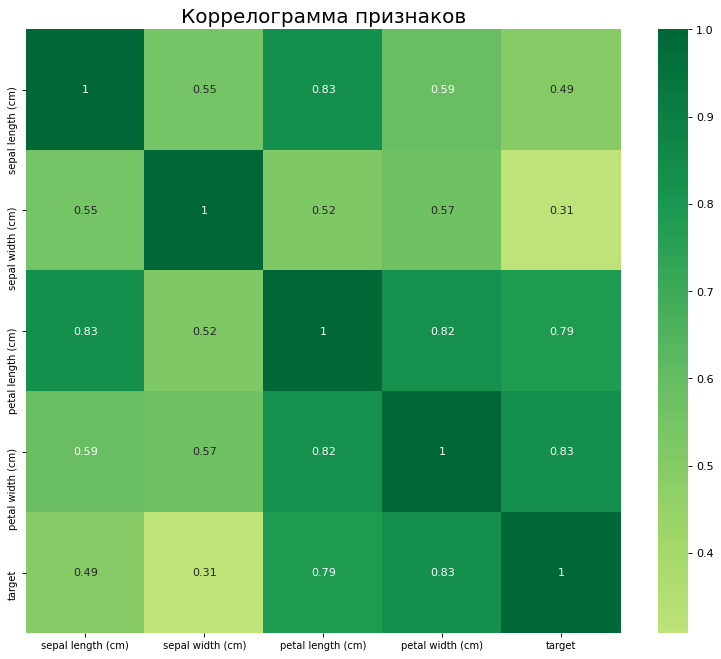

In [41]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr()\
            .columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Коррелограмма признаков', fontsize=18)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [42]:
# по шкале Чеддока примем сильными взаимосвязи целевой переменной с признаками petal length (cm), petal width (cm)

In [43]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace= True) # оставлю два признака
df.rename(columns = {'petal length (cm)':'x1', 'petal width (cm)':'x2'}, inplace = True) # переименую для краткости
df.head(1)

,x1,x2,target
50,4.7,1.4,0


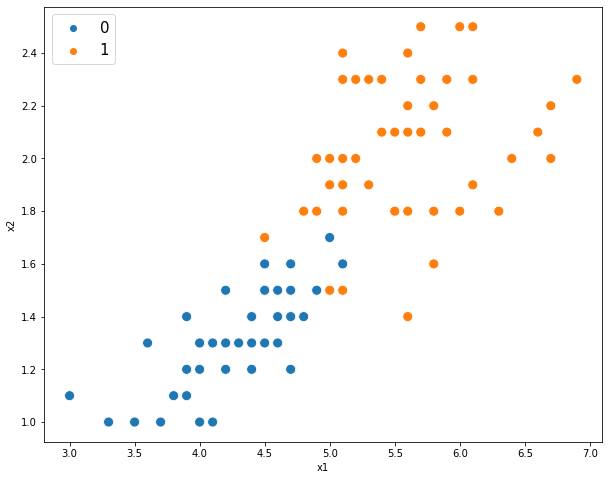

In [44]:
# зададим размер графика
plt.figure(figsize = (10, 8))
# на точечной диаграмме по осям x и y выведем признаки,
# с помощью параметра hue разделим соответствующие классы целевой переменной
sns.scatterplot(x = df.x1, y = df.x2, hue = df.target, s = 100)
# добавим легенду, зададим ее расположение и размер
plt.legend(loc = 'upper left', prop = {'size': 15})
# выведем результат
plt.show()

In [45]:
y = df['target'].to_numpy()

X = df[['x1', 'x2']].to_numpy()

In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)
# приведем признаки к одному масштабу

(array([-5.42066392e-16, -1.28397293e-15]), array([1., 1.]))

In [47]:
X = np.c_[np.ones(len(X)), X]
display(X, y);

array([[ 1.        , -0.25077906, -0.65303909],
       [ 1.        , -0.49425387, -0.41643072],
       [ 1.        , -0.00730424, -0.41643072],
       [ 1.        , -1.10294091, -0.88964745],
       [ 1.        , -0.37251647, -0.41643072],
       [ 1.        , -0.49425387, -0.88964745],
       [ 1.        , -0.25077906, -0.17982236],
       [ 1.        , -1.95510276, -1.59947255],
       [ 1.        , -0.37251647, -0.88964745],
       [ 1.        , -1.22467832, -0.65303909],
       [ 1.        , -1.71162795, -1.59947255],
       [ 1.        , -0.8594661 , -0.41643072],
       [ 1.        , -1.10294091, -1.59947255],
       [ 1.        , -0.25077906, -0.65303909],
       [ 1.        , -1.58989054, -0.88964745],
       [ 1.        , -0.61599128, -0.65303909],
       [ 1.        , -0.49425387, -0.41643072],
       [ 1.        , -0.9812035 , -1.59947255],
       [ 1.        , -0.49425387, -0.41643072],
       [ 1.        , -1.22467832, -1.36286418],
       [ 1.        , -0.12904165,  0.293

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [48]:
def sigmoid(x):
    return 1 / (1 + np.exp(- x))

In [49]:
def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30)) # избегаем ноль в логарифме
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_1 + logloss_0) / len(y)
    return logloss_total

In [50]:
def grad_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [51]:
eps = 0.0001 # минимальное значение для отработки критерия останова

np.random.seed(42) #псевдослучайный генератор случайных чисел
W = np.random.randn(X.shape[1]) # начальная точка старта скатывания

l_r = 0.0001 # шаг

next_W = W # следующая точка равна предыдущей (модель "шагания")

n = 1020 # количество итераций (подобрал перебиранием значений, при котором logloss был минимальным)

for i in range(n):
    cur_W = next_W
    
    # шаг градиентного спуска в сторону уменьшения ошибки
    next_W = cur_W - l_r * grad_logloss(X, W, y)
    
    if np.linalg.norm(cur_W - next_W) <= eps: # условие останова
        break
    if i % 30 == 0:        
        print(f'Итерация: {i}')
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0) # распределение по классам границей 0,5
        accuracy = (y_class == y).sum() / len(y) # доля правильных ответов       
        print(f'Кросс-энтропия {logloss(y, y_proba)}')
        print(f'Метрика качества {accuracy}')        
        print('___________________')
        

Итерация: 0
Кросс-энтропия 0.5409718714849672
Метрика качества 0.66
___________________
Итерация: 30
Кросс-энтропия 0.486829218211118
Метрика качества 0.81
___________________
Итерация: 60
Кросс-энтропия 0.4391393057744641
Метрика качества 0.84
___________________
Итерация: 90
Кросс-энтропия 0.39740189760138483
Метрика качества 0.92
___________________
Итерация: 120
Кросс-энтропия 0.36104234328784784
Метрика качества 0.92
___________________
Итерация: 150
Кросс-энтропия 0.32946224300143045
Метрика качества 0.93
___________________
Итерация: 180
Кросс-энтропия 0.30207875665347445
Метрика качества 0.94
___________________
Итерация: 210
Кросс-энтропия 0.27834983494264764
Метрика качества 0.94
___________________
Итерация: 240
Кросс-энтропия 0.2577870976104261
Метрика качества 0.94
___________________
Итерация: 270
Кросс-энтропия 0.23995983617180294
Метрика качества 0.93
___________________
Итерация: 300
Кросс-энтропия 0.2244935330513375
Метрика качества 0.93
___________________
Итерация: 

In [52]:
df.target.value_counts() # количество значений

0    50
1    50
Name: target, dtype: int64

In [53]:
# а также построим матрицу ошибок
# столбцами будут прогнозные значения (Forecast),
# строками - фактические (Actual)
pd.DataFrame(confusion_matrix(y, y_class),
             columns = ['Forecast 0', 'Forecast 1'],
             index = ['Actual 0', 'Actual 1'])

,Forecast 0,Forecast 1
Actual 0,49,1
Actual 1,4,46


In [54]:
# оценим результат с помощью метрики accuracy
# совпадает с "ручной метрикой"
accuracy_score(y, y_class)

0.95